In [ ]:
from faker import Faker
import pandas as pd
import random

fake = Faker()

data = []

categories = ["Electronics", "Clothing", "Books", "Home", "Beauty", ]

for i in range(500):
    data.append({
        "order_id" : fake.uuid4(),
        "order_date" : fake.date_between(start_date="-6M", end_date= "today"),
        "customer_id" : fake.random_int(min= 1000, max=9999),
        "product_category" : random.choice(categories),
        "price": round(random.uniform(100, 5000), 2),
        "quantity" : random.randint(1, 5),
        "discount_percent" : random.choice([0, 5, 10, 15, 20])
    })

df = pd.DataFrame(data)
print(df)


                                 order_id  order_date  customer_id  \
0    fc43897a-8b1d-4d9c-bf67-5fb4d048202d  2025-07-22         7410   
1    b8001241-52b8-45cd-bbb9-a9d31689fd0e  2025-12-20         2748   
2    cac7b4fa-186d-4d6a-87e2-2c819d628e97  2025-12-02         7017   
3    b60bed05-efe5-45e5-b087-e4c74960d31c  2025-08-30         1040   
4    dd51f602-234b-497e-a031-6566cbbdfd6b  2025-07-21         1024   
..                                    ...         ...          ...   
495  f40cb1d1-ee30-401b-bef3-63c83dc47101  2025-10-28         2283   
496  55d2a5be-55b8-4626-9e6b-d5877027241b  2025-09-29         5223   
497  4c33e46d-72de-495e-9221-02e75cf8f17b  2025-12-27         1612   
498  8cfd6807-2bba-4c1c-a271-da03bc62ed26  2025-12-01         7639   
499  016e9a88-c359-47bf-b6b1-ad5880f84c55  2026-01-06         4959   

    product_category    price  quantity  discount_percent  
0           Clothing  1132.86         4                 5  
1               Home  4754.01         5

compute the final order amount after discount

In [7]:
df["total_price"] = df["price"] * df["quantity"]

df["discount_amount"] = df["total_price"] * (df["discount_percent"] / 100)

df["final_amount"] = df["total_price"] - df["discount_amount"]

print(df["final_amount"].head(5))

0     4304.868
1    19016.040
2    15872.500
3     6368.950
4     3007.098
Name: final_amount, dtype: float64


identify top 3 categories by total revenue

In [8]:
top_categories = df.groupby("product_category")["final_amount"].sum().head(3)
top_categories

product_category
Beauty      748200.3570
Books       795594.1375
Clothing    691182.8570
Name: final_amount, dtype: float64

calculate monthly revenue per product category

In [9]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["month"] = df["order_date"].dt.to_period("M")
monthly_revenue = df.groupby(["month", "product_category"])["final_amount"].sum()
print(monthly_revenue)

month    product_category
2025-07  Beauty               66409.6765
         Books                67454.3970
         Clothing              9524.7535
         Electronics          25669.3600
         Home                 30468.6595
2025-08  Beauty               60363.3550
         Books               143628.7135
         Clothing             98111.5770
         Electronics          90448.8985
         Home                 98190.5965
2025-09  Beauty              127047.4995
         Books                74359.9435
         Clothing            104963.6180
         Electronics         100683.2170
         Home                107276.7240
2025-10  Beauty              109121.5635
         Books               124078.6995
         Clothing            169570.9225
         Electronics          58608.2955
         Home                 92136.4975
2025-11  Beauty              147030.5000
         Books               120092.7080
         Clothing            132399.6870
         Electronics         13

#using numpy
detect unsually high or low order values

In [10]:
import numpy as np

print(df["final_amount"])
values = df["final_amount"]

mean = np.mean(values)
print(mean)

std = np.std(values)
print(std)

less_deviation = mean  - std
more_deviation = mean +  std

anomalies = df[(values < less_deviation) | (values > more_deviation)]
print("Anmolies: ")
print(anomalies)



0       4304.8680
1      19016.0400
2      15872.5000
3       6368.9500
4       3007.0980
          ...    
495    14164.7850
496     2976.3100
497     2937.9200
498    11783.1825
499    14168.7940
Name: final_amount, Length: 500, dtype: float64
6907.140186
5309.972326388635
Anmolies: 
                                 order_id order_date  customer_id  \
1    b8001241-52b8-45cd-bbb9-a9d31689fd0e 2025-12-20         2748   
2    cac7b4fa-186d-4d6a-87e2-2c819d628e97 2025-12-02         7017   
6    66a1f0c2-b26f-43f6-a7d6-214cb4f40d4a 2025-10-13         8472   
7    324cb378-fe19-46d5-b5f2-0354e438172a 2025-12-02         9643   
12   8a755f23-4db4-4bfe-b284-7d2aeee16974 2025-10-07         7245   
..                                    ...        ...          ...   
488  a3f05b95-2869-4d21-9f16-bfb0f5179de5 2025-09-06         4520   
492  4f0dcc71-d579-4b52-b1c4-9c22b1de2210 2025-11-14         1899   
494  5d6299ba-9bf0-4fb9-ae85-b1cb0291491a 2026-01-09         4465   
495  f40cb1d1-ee30-401b

In [75]:
median_value = np.median(values)

df.loc[(values < less_deviation)| (values > more_deviation), "final_amount"] = median_value
print("anomalies replaced with median values")

anomalies replaced with median values


plot montly revenue trends

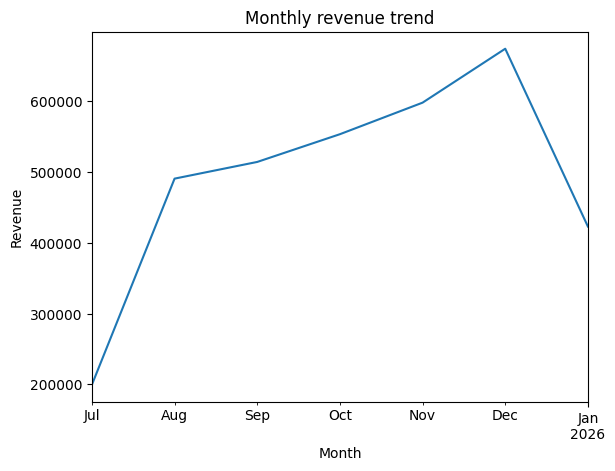

In [18]:
import matplotlib.pyplot as plt

monthly_total = df.groupby("month")["final_amount"].sum()
monthly_total.plot(kind = "line")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly revenue trend")
plt.show()

compare revenue distribution across categories

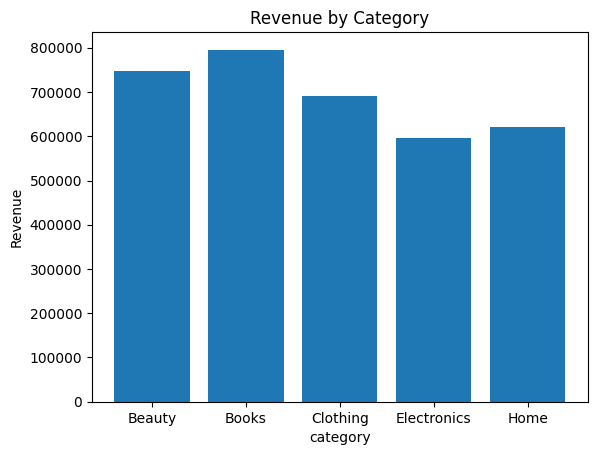

In [ ]:
category_revenue = df.groupby("product_category")["final_amount"].sum()
category_revenue.plot(kind="bar")
plt.title("Revenue by Category")
plt.xlabel("category")
plt.ylabel("Revenue")
plt.show()